#Реализация поиска кратчайших путей

In [1]:
!pip install python-graphblas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.4/18.4 MB 41.1 MB/s eta 0:00:00


In [30]:
import graphblas as gb
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from graphblas import Matrix, dtypes, unary, binary, monoid, semiring, Recorder, Vector
from graphblas.io import mmread
import time
import sys
import random

# Задача 1

 Используя python-graphblas реализовать функцию поиска кратчайших путей в ориентированном графе из заданной вершины (`Bellman–Ford`).
 * Функция принимает представление графа, удобное для неё (загрузка, конвертация реализованы отдельно) и номер стартовой вершины.  
 * Функция возвращает массив, где для каждой вершины указано расстояние до неё от указанной стартовой вершины. Если вершина не достижима или кратчайшего пути для неё не существует, то значение соответствующей ячейки равно float('inf').


In [31]:
def fun_Bellman_Ford(A, s):
    n = A.nrows
    v = Vector(A.dtype, A.nrows)  #  вектор расстояний
    v[s] << 0  # Расстояние до выбранной вершины  0
    w = v.dup()  # копия вектора расстояний для сравнений

    for k in range(n-1):
        w_old = w.dup()  # Сохраняем предыдущие значения
        w(binary.min) << w.vxm(A, semiring.min_plus)  # Обновляем значения расстояний
        if w.isequal(w_old):  # Если расстояния не изменились, то прерываем цикл
            break
    for i in range(n):  # Проверка на наличие отрицательных циклов
        if w[i].value is not None and w[i].value < 0:
            raise Exception("Ошибка: в графе есть цикл отрицательного веса")
    result = []
    for i in range(n):
        result.append((i, float('inf') if w[i].value is None else w[i].value))
    return result

## Проверка 1

Пример с лекции

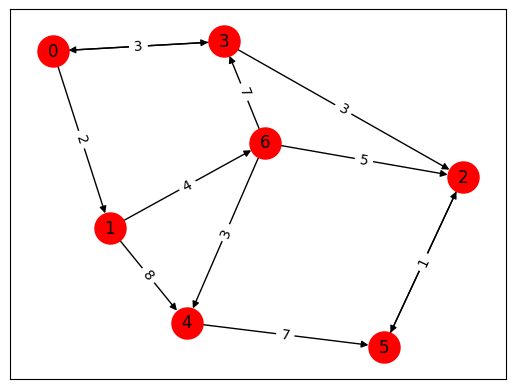

In [32]:
data = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    [3, 2, 3, 1, 5, 3, 7, 8, 3, 1, 7, 4],
]
rows, cols, weights = data
m = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(m)

In [33]:
start_vertices = 1
fun_Bellman_Ford(m, start_vertices)

[(0, 14), (1, 0), (2, 9), (3, 11), (4, 7), (5, 10), (6, 4)]

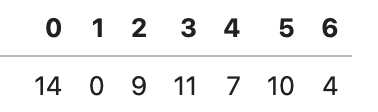

Ответ верный

## Проверка 2

Отрицательные веса

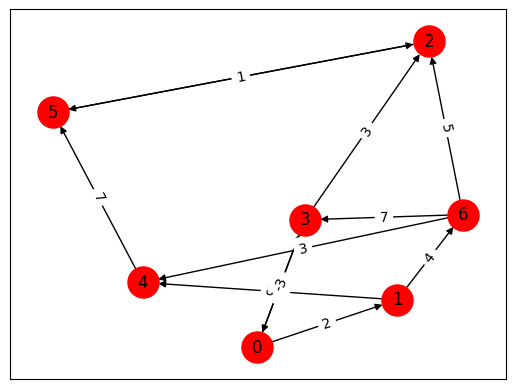

In [34]:
data = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    [-3, 2, 3, 1, 5, 3, 7, 8, 3, 1, 7, 4],
]
rows, cols, weights = data
D = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(D)

In [35]:
start_vertices = 3
fun_Bellman_Ford(D, start_vertices)

Exception: Ошибка: в графе есть цикл отрицательного веса

# Задача 2

 Используя python-graphblas реализовать функцию поиска кратчайших путей в ориентированном графе из нескольких заданных вершин, модифицировав предыдущий алгоритм.  
 * Функция принимает представление графа, удобное для неё (загрузка, конвертация реализованы отдельно) и массив номеров стартовых вершин.  
 * Функция возвращает массив пар: вершина, и массив, где для каждой вершины указано расстояние до неё из указанной. Если вершина не достижима или кратчайшего пути для неё не существует, то значение соответствующей ячейки равно float('inf').

In [36]:
def Matrx_Bellman_Ford(A, sources):
    n = A.nrows
    v = Matrix(A.dtype, len(sources), n)
    for i, source in enumerate(sources):
        v[i, source] << 0
    w = v.dup()

    for k in range(n-2):
        w_old = w.dup()
        w(binary.min) << w.mxm(A, semiring.min_plus) # Обновляем значения расстояний
        if w.isequal(w_old):
            break
    for i in range(len(sources)):
        for j in range(n):
            if w[i, j].value is not None and w[i, j].value < 0:
                raise Exception("Ошибка: в графе есть цикл отрицательного веса")
    result = []
    for i in range(len(sources)):
        distances = [float('inf') if w[i, j].value is None else w[i, j].value for j in range(n)]
        result.append((sources[i], distances))
    return result


## Проверка 1

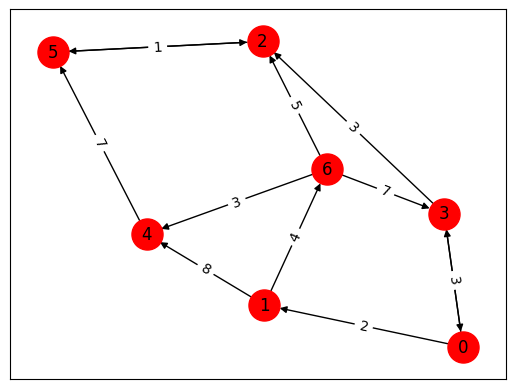

In [37]:
data = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    [3, 2, 3, 1, 5, 3, 7, 8, 3, 1, 7, 4],
]
rows, cols, weights = data
m = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(m)

In [38]:
start_vertices = [1,3,4]
Matrx_Bellman_Ford(m, start_vertices)

[(1, [14, 0, 9, 11, 7, 10, 4]),
 (3, [3, 5, 3, 0, 12, 4, 9]),
 (4, [inf, inf, 8, inf, 0, 7, inf])]

## Проверка 2

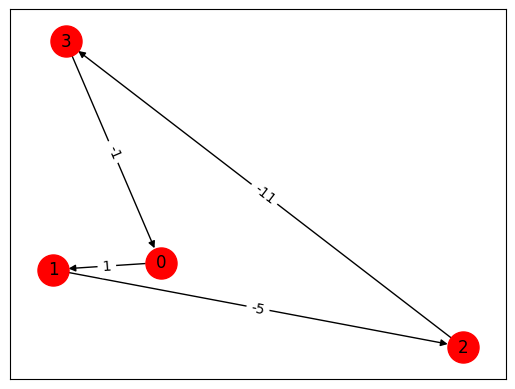

In [39]:
data = [
    [0, 1, 2, 3],
    [1, 2, 3, 0],
    [1, -5, -11, -1],
]

rows, cols, weights = data
n = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(n)

In [40]:
start_vertices = [0,1]
matrix_Bellman_Ford(n, start_vertices)

NameError: name 'matrix_Bellman_Ford' is not defined

## Проверка Bellman–Ford martix и n-векторов

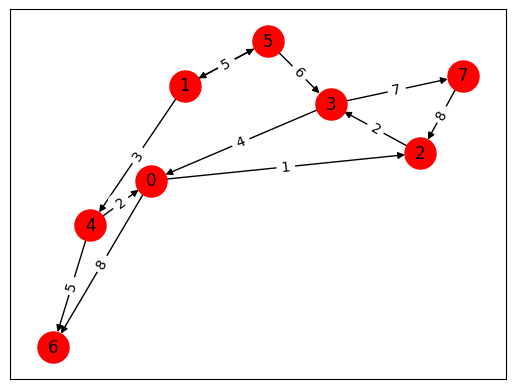

In [15]:
data = [
    [3, 0, 2, 5, 7, 1, 5, 1, 4, 0, 4, 3],  # Изменены индексы строк
    [0, 2, 3, 1, 2, 4, 3, 5, 0, 6, 6, 7],  # Изменены индексы столбцов
    [4, 1, 2, 5, 8, 3, 6, 7, 2, 8, 5, 7],  # Изменены веса рёбер
]
rows, cols, weights = data
A = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(A)

In [16]:
start_vertices = [1,4,6]
S = 1
print('Bellman_Ford:\n', fun_Bellman_Ford(A, 1),fun_Bellman_Ford(A, 4),fun_Bellman_Ford(A,6), sep ='\n')
print('\n')
print('Matrx_Bellman_Ford:\n')
start_vertices = [1,4,6]
Matrx_Bellman_Ford(A,start_vertices )

Bellman_Ford:

[(0, 5), (1, 0), (2, 6), (3, 8), (4, 3), (5, 7), (6, 8), (7, 15)]
[(0, 2), (1, inf), (2, 3), (3, 5), (4, 0), (5, inf), (6, 5), (7, 12)]
[(0, inf), (1, inf), (2, inf), (3, inf), (4, inf), (5, inf), (6, 0), (7, inf)]


Matrx_Bellman_Ford:



[(1, [5, 0, 6, 8, 3, 7, 8, 15]),
 (4, [2, inf, 3, 5, 0, inf, 5, 12]),
 (6, [inf, inf, inf, inf, inf, inf, 0, inf])]

`Результаты совпали`

# Задача 3

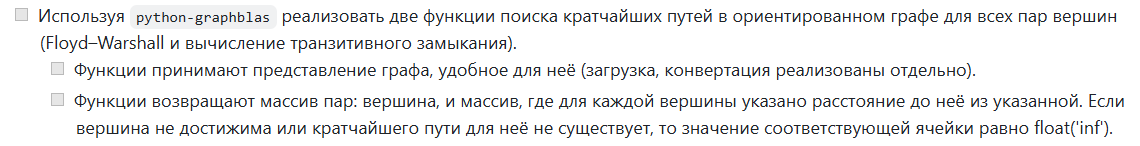

## Floyd–Warshall

In [17]:
def Floyd_Warshall(A):
    n = A.nrows
    dist = A.dup()  # Инициализируем матрицу расстояний исходной матрицей смежности
    for i in range(n):
        dist[i, i] << 0
    for k in range(n):
        for i in range(n):
            for j in range(n):
              dist_old = dist.dup()
              dist(binary.min) << dist.mxm(A, semiring.min_plus)
              if dist.isequal(dist_old):
                break

    for i in range(n):
        if dist[i, i].value is not None and dist[i, i].value < 0:
            raise Exception("Ошибка: в графе есть цикл отрицательного веса")

    result = []
    for i in range(n):
        result.append((i, [float('inf') if dist[i, j].value is None else dist[i, j].value for j in range(n)]))

    return result

### Проверка 1

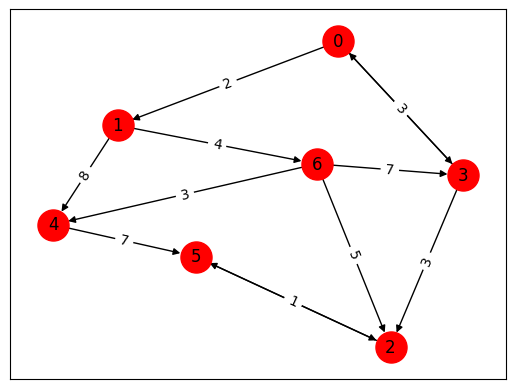

In [18]:
data = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    [3, 2, 3, 1, 5, 3, 7, 8, 3, 1, 7, 4],
]
rows, cols, weights = data
m = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(m)

In [19]:
Floyd_Warshall(m)

[(0, [0, 2, 6, 3, 9, 7, 6]),
 (1, [14, 0, 9, 11, 7, 10, 4]),
 (2, [inf, inf, 0, inf, inf, 1, inf]),
 (3, [3, 5, 3, 0, 12, 4, 9]),
 (4, [inf, inf, 8, inf, 0, 7, inf]),
 (5, [inf, inf, 1, inf, inf, 0, inf]),
 (6, [10, 12, 5, 7, 3, 6, 0])]

### Проверка 2

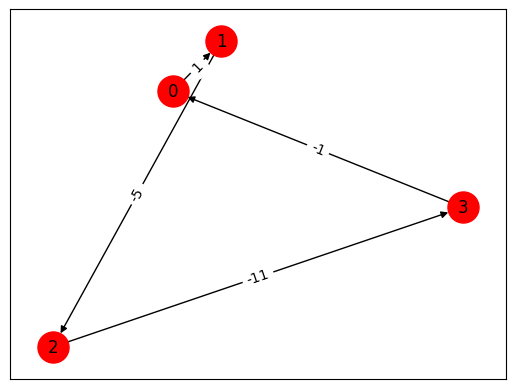

In [20]:
data = [
    [0, 1, 2, 3],
    [1, 2, 3, 0],
    [1, -5, -11, -1],
]

rows, cols, weights = data
n = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(n)

In [21]:
Floyd_Warshall(n)

Exception: Ошибка: в графе есть цикл отрицательного веса

## Тразитивные замыкания / вычисления


In [22]:
def Transitive_closure(A):
    n = A.nrows
    I = Matrix(dtypes.INT32, n, n)

    for i in range(n): # Инициализация диагонали единичной матрицы
        I[i, i] << 1

    D = A.dup()

    for k in range(n):
        D_old = D.dup()
        D(binary.min) << D.mxm(A, semiring.min_plus)
        D(binary.min) << D.ewise_add(I, binary.min) # Обновляем значения с учетом единичной матрицы
        if D.isequal(D_old):
            break

    # Проверка на отрицательные веса
    D_check = D.dup()
    D_check(binary.min) << D.mxm(A, semiring.min_plus)
    D_check(binary.min) << D_check.ewise_add(I, binary.min)
    if not D_check.isequal(D):
        raise Exception("Ошибка: в графе есть цикл отрицательного веса")

    result = {}
    for i in range(n):
        result[i] = [float('inf') if D[i, j].value is None else (0 if i == j else D[i, j].value) for j in range(n)]

    return result

###  Проверка 1

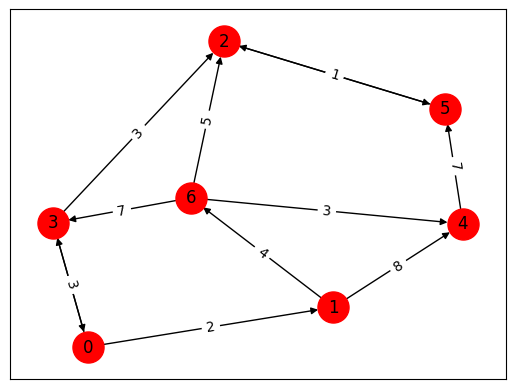

In [23]:
data = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    [3, 2, 3, 1, 5, 3, 7, 8, 3, 1, 7, 4],
]
rows, cols, weights = data
m = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(m)

In [24]:
Transitive_closure(m)

{0: [0, 2, 6, 3, 9, 7, 6],
 1: [14, 0, 9, 11, 7, 10, 4],
 2: [inf, inf, 0, inf, inf, 1, inf],
 3: [3, 5, 3, 0, 12, 4, 9],
 4: [inf, inf, 8, inf, 0, 7, inf],
 5: [inf, inf, 1, inf, inf, 0, inf],
 6: [10, 12, 5, 7, 3, 6, 0]}

### Проверка 2

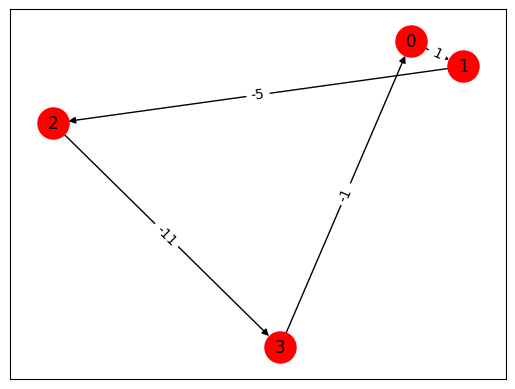

In [25]:
data = [
    [0, 1, 2, 3],
    [1, 2, 3, 0],
    [1, -5, -11, -1],
]

rows, cols, weights = data
n = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(n)

In [26]:
Transitive_closure(n)

Exception: Ошибка: в графе есть цикл отрицательного веса

## Проверка Floyd–Warshall и транзитивного замыкания

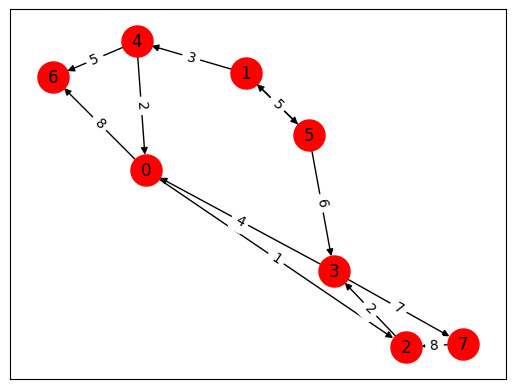

In [27]:
data = [
    [3, 0, 2, 5, 7, 1, 5, 1, 4, 0, 4, 3],  # Изменены индексы строк
    [0, 2, 3, 1, 2, 4, 3, 5, 0, 6, 6, 7],  # Изменены индексы столбцов
    [4, 1, 2, 5, 8, 3, 6, 7, 2, 8, 5, 7],  # Изменены веса рёбер
]
rows, cols, weights = data
A = Matrix.from_coo(rows, cols, weights)
gb.viz.draw(A)

In [28]:
Floyd_Warshall(A)

[(0, [0, inf, 1, 3, inf, inf, 8, 10]),
 (1, [5, 0, 6, 8, 3, 7, 8, 15]),
 (2, [6, inf, 0, 2, inf, inf, 14, 9]),
 (3, [4, inf, 5, 0, inf, inf, 12, 7]),
 (4, [2, inf, 3, 5, 0, inf, 5, 12]),
 (5, [10, 5, 11, 6, 8, 0, 13, 13]),
 (6, [inf, inf, inf, inf, inf, inf, 0, inf]),
 (7, [14, inf, 8, 10, inf, inf, 22, 0])]

In [29]:
Transitive_closure(A)

{0: [0, inf, 1, 3, inf, inf, 8, 10],
 1: [5, 0, 6, 8, 3, 7, 8, 15],
 2: [6, inf, 0, 2, inf, inf, 14, 9],
 3: [4, inf, 5, 0, inf, inf, 12, 7],
 4: [2, inf, 3, 5, 0, inf, 5, 12],
 5: [10, 5, 11, 6, 8, 0, 13, 13],
 6: [inf, inf, inf, inf, inf, inf, 0, inf],
 7: [14, inf, 8, 10, inf, inf, 22, 0]}

Совпало

#Проверка на больших графах

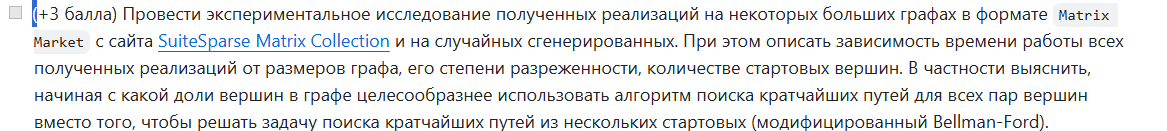

In [ ]:
M2 = mmread('/content/datta.mtx')
M2

"M_1"      nvals  nrows  ncols  dtype     format
gb.Matrix  30186   2851   2851   FP64  csr (iso)
------------------------------------------------
     0    1    2    3    4    5    6    7    8    9     ... 2841 2842 2843  \
0          1.0  1.0  1.0  1.0  1.0  1.0                 ...                  
1     1.0       1.0  1.0  1.0  1.0       1.0            ...                  
2     1.0  1.0       1.0  1.0       1.0  1.0  1.0  1.0  ...                  
3     1.0  1.0  1.0            1.0  1.0  1.0  1.0  1.0  ...                  
4     1.0  1.0  1.0            1.0  1.0  1.0            ...                  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2846                                                    ...                  
2847                                                    ...                  
2848                                                    ...                  
2849                                                    ...                  
2850                                                    ...                  

     2844 2845 2846 2847 2848 2849 2850  
0                                        
1                                        
2                                        
3                                        
4                                        
...   ...  ...  ...  ...  ...  ...  ...  
2846       1.0       1.0                 
2847            1.0       1.0            
2848                 1.0       1.0       
2849                      1.0       1.0  
2850                           1.0

In [ ]:
fun_Bellman_Ford(M2, 1)

[(0, 1.0),
 (1, 0.0),
 (2, 1.0),
 (3, 1.0),
 (4, 1.0),
 (5, 1.0),
 (6, 2.0),
 (7, 1.0),
 (8, 2.0),
 (9, 2.0),
 (10, 2.0),
 (11, 2.0),
 (12, 3.0),
 (13, 3.0),
 (14, 3.0),
 (15, 3.0),
 (16, 4.0),
 (17, 4.0),
 (18, 4.0),
 (19, 4.0),
 (20, 5.0),
 (21, 5.0),
 (22, 5.0),
 (23, 5.0),
 (24, 6.0),
 (25, 6.0),
 (26, 6.0),
 (27, 6.0),
 (28, 1.0),
 (29, 1.0),
 (30, 1.0),
 (31, 2.0),
 (32, 2.0),
 (33, 2.0),
 (34, 3.0),
 (35, 3.0),
 (36, 4.0),
 (37, 4.0),
 (38, 5.0),
 (39, 5.0),
 (40, 6.0),
 (41, 6.0),
 (42, 2.0),
 (43, 2.0),
 (44, 2.0),
 (45, 2.0),
 (46, 2.0),
 (47, 3.0),
 (48, 3.0),
 (49, 3.0),
 (50, 4.0),
 (51, 4.0),
 (52, 5.0),
 (53, 5.0),
 (54, 6.0),
 (55, 6.0),
 (56, 3.0),
 (57, 3.0),
 (58, 3.0),
 (59, 3.0),
 (60, 3.0),
 (61, 3.0),
 (62, 3.0),
 (63, 4.0),
 (64, 4.0),
 (65, 4.0),
 (66, 5.0),
 (67, 5.0),
 (68, 6.0),
 (69, 6.0),
 (70, 4.0),
 (71, 4.0),
 (72, 4.0),
 (73, 4.0),
 (74, 4.0),
 (75, 4.0),
 (76, 4.0),
 (77, 4.0),
 (78, 4.0),
 (79, 5.0),
 (80, 5.0),
 (81, 5.0),
 (82, 6.0),
 (83, 6.0),
 (

In [ ]:
M3 = mmread('/content/G222.mtx')
M3

"M_2"      nvals  nrows  ncols  dtype     format
gb.Matrix  38352    800    800   FP64  csr (iso)
------------------------------------------------
    0    1   2   3   4    5   6    7   8    9    ... 790  791  792  793  794  \
0                                  1.0      1.0  ...                     1.0   
1                                                ...      1.0                  
2                         1.0                    ...                           
3                                                ...           1.0             
4                                                ...      1.0                  
..   ..  ...  ..  ..  ..  ...  ..  ...  ..  ...  ...  ..  ...  ...  ...  ...   
795                                1.0           ...                1.0        
796                                              ...                1.0        
797                                              ...                           
798                                              ...                1.0        
799      1.0                                     ...                           

    795 796 797 798  799  
0                         
1                    1.0  
2                         
3                         
4                         
..   ..  ..  ..  ..  ...  
795                       
796                       
797                       
798                       
799

In [ ]:
fun_Bellman_Ford(M3, 1)

[(0, 3.0),
 (1, 0.0),
 (2, 3.0),
 (3, 2.0),
 (4, 2.0),
 (5, 2.0),
 (6, 2.0),
 (7, 2.0),
 (8, 2.0),
 (9, 2.0),
 (10, 2.0),
 (11, 2.0),
 (12, 3.0),
 (13, 2.0),
 (14, 2.0),
 (15, 2.0),
 (16, 1.0),
 (17, 2.0),
 (18, 1.0),
 (19, 2.0),
 (20, 2.0),
 (21, 2.0),
 (22, 2.0),
 (23, 2.0),
 (24, 3.0),
 (25, 2.0),
 (26, 2.0),
 (27, 1.0),
 (28, 1.0),
 (29, 2.0),
 (30, 2.0),
 (31, 2.0),
 (32, 2.0),
 (33, 2.0),
 (34, 2.0),
 (35, 2.0),
 (36, 2.0),
 (37, 2.0),
 (38, 2.0),
 (39, 2.0),
 (40, 2.0),
 (41, 2.0),
 (42, 3.0),
 (43, 2.0),
 (44, 2.0),
 (45, 2.0),
 (46, 2.0),
 (47, 2.0),
 (48, 2.0),
 (49, 2.0),
 (50, 2.0),
 (51, 2.0),
 (52, 2.0),
 (53, 2.0),
 (54, 2.0),
 (55, 2.0),
 (56, 3.0),
 (57, 2.0),
 (58, 2.0),
 (59, 2.0),
 (60, 2.0),
 (61, 2.0),
 (62, 3.0),
 (63, 2.0),
 (64, 2.0),
 (65, 2.0),
 (66, 2.0),
 (67, 1.0),
 (68, 2.0),
 (69, 2.0),
 (70, 2.0),
 (71, 2.0),
 (72, 2.0),
 (73, 2.0),
 (74, 2.0),
 (75, 2.0),
 (76, 2.0),
 (77, 2.0),
 (78, 2.0),
 (79, 2.0),
 (80, 3.0),
 (81, 3.0),
 (82, 2.0),
 (83, 2.0),
 (

In [ ]:
import time

def time_fun_Bellman_Ford(m, sources):
    print('Bellman_Ford:')
    start_time = time.time()
    [fun_Bellman_Ford(m, source) for source in sources]
    end_time = time.time()
    print(f"Время выполнения: {end_time - start_time} секунд")

def time_Matrx_Bellman_Ford(m, sources):
    print('Матричный_Bellman_Ford:')
    start_time = time.time()
    Matrx_Bellman_Ford(m, sources)
    end_time = time.time()
    print(f"Время выполнения: {end_time - start_time} секунд")

def time_Floyd_Warshall(m):
    print('Floyd_Warshall:')
    start_time = time.time()
    Floyd_Warshall(m)
    end_time = time.time()
    print(f"Время выполнения: {end_time - start_time} секунд")

def time_Transitive_closure(m):
    print('Транзитивное замыкание:')
    start_time = time.time()
    Transitive_closure(m)
    end_time = time.time()
    print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
def vertex_generate(n, p):
    population = range(n)
    vertex_array = random.sample(population, round(n * p))
    return np.array(vertex_array)

In [ ]:
graph = [M2, M3]
gen_vertex = [0.01, 0.05, 0.1, 0.5] # доля генерируемых вершин
for graph_i in graph:
    print('Количество вершин:', graph_i.nrows, 'Количество ребер:', graph_i.nvals)
    for p in gen_vertex:
        vertex = vertex_generate(graph_i.nrows, p)
        print('Доля стартовых вершин:', p)
        print(time_fun_Bellman_Ford(graph_i, vertex))
        print(time_Matrx_Bellman_Ford(graph_i, vertex))

Количество вершин: 2851 Количество ребер: 30186
Доля стартовых вершин: 0.01
Bellman_Ford:
Время выполнения: 10.282887697219849 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 12.430292844772339 секунд
None
Доля стартовых вершин: 0.05
Bellman_Ford:
Время выполнения: 48.38303184509277 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 60.52470541000366 секунд
None
Доля стартовых вершин: 0.1
Bellman_Ford:
Время выполнения: 96.09823274612427 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 121.07228493690491 секунд
None
Доля стартовых вершин: 0.5
Bellman_Ford:
Время выполнения: 483.1336522102356 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 618.4468340873718 секунд
None
Количество вершин: 800 Количество ребер: 38352
Доля стартовых вершин: 0.01
Bellman_Ford:
Время выполнения: 1.2098455429077148 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.8679335117340088 секунд
None
Доля стартовых вершин: 0.05
Bellman_Ford:
Время выполнения: 3.371245861053467 секунд
None
Ма

In [ ]:
vertex = [[1, 5], [10, 5, 85], [22, 53, 4, 51], [22, 53, 4, 51, 22, 53, 4, 51, 22, 53, 4, 51, 22, 53, 4, 51, 22, 53, 4, 51]]
graph = M3
print('Количество вершин:', M3.nrows, 'Количество ребер:', M3.nvals)
for num in vertex:
    valid_sources = [n for n in num if n < graph.nrows]
    print('Количество стартовых вершин:', len(valid_sources))
    print(time_Matrx_Bellman_Ford(graph, valid_sources))

Количество вершин: 800 Количество ребер: 38352
Количество стартовых вершин: 2
Матричный_Bellman_Ford:
Время выполнения: 0.2135758399963379 секунд
None
Количество стартовых вершин: 3
Матричный_Bellman_Ford:
Время выполнения: 0.35520315170288086 секунд
None
Количество стартовых вершин: 4
Матричный_Bellman_Ford:
Время выполнения: 0.8828341960906982 секунд
None
Количество стартовых вершин: 20
Матричный_Bellman_Ford:
Время выполнения: 2.700593948364258 секунд
None


In [ ]:
# Тестирование на случайно сгенерированных графах

def generate_graph(num_vertices, num_edges):
    # Создание множества (без диагональных элементов)
    positions = []
    for ind in range(num_vertices**2):
        if ind // num_vertices != ind % num_vertices:
            positions.append(ind)
    # Отбор num_edges случайных индексов вершин (случайные значения из high_positions) для создания ребер
    gen_indices = random.sample(positions, num_edges)
    # Преобразуем в координаты (строка, столбец)
    row_indices, col_indices = np.unravel_index(gen_indices, (num_vertices, num_vertices))

    return Matrix.from_coo(row_indices, col_indices, [1]*len(row_indices), nrows=num_vertices, ncols=num_vertices)

In [ ]:
# Количество строк и плотности графов
num_rows = 15
edge_densities = [45, 33, 22, 11]
proportions_of_vertices = [0.1, 0.3, 0.5, 0.75, 1.0]  # Доля генерируемых вершин

for density in edge_densities:
    graph = generate_graph(num_rows, density)
    print('Количество вершин:', graph.nrows, 'Количество ребер:', graph.nvals)
    print(time_Floyd_Warshall(graph))
    print(time_Transitive_closure(graph))
    for proportion in proportions_of_vertices:
        vertices = vertex_generate(graph.nrows, proportion)
        print('Количество стартовых вершин:', round(graph.nrows * proportion))
        print(time_fun_Bellman_Ford(graph, vertices))
        print(time_Matrx_Bellman_Ford(graph, vertices))

Количество вершин: 15 Количество ребер: 45
Floyd_Warshall:
Время выполнения: 0.04908108711242676 секунд
None
Транзитивное замыкание:
Время выполнения: 0.016628026962280273 секунд
None
Количество стартовых вершин: 2
Bellman_Ford:
Время выполнения: 0.004209041595458984 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.004425048828125 секунд
None
Количество стартовых вершин: 4
Bellman_Ford:
Время выполнения: 0.007957696914672852 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.013542652130126953 секунд
None
Количество стартовых вершин: 8
Bellman_Ford:
Время выполнения: 0.02275562286376953 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.016739845275878906 секунд
None
Количество стартовых вершин: 11
Bellman_Ford:
Время выполнения: 0.021790504455566406 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.023833513259887695 секунд
None
Количество стартовых вершин: 15
Bellman_Ford:
Время выполнения: 0.034066200256347656 секунд
None
Матричный_Bellman_Ford:
Время выполнен

In [ ]:
# Параметры графа и доля генерируемых вершин
num_rows = 15
edge_densities = [43, 33, 22, 11]
proportions_of_vertices = [0.75, 0.85, 1.0]  # Доля генерируемых вершин
initial_vertex = [1]

for density in edge_densities:
    graph = generate_graph(num_rows, density)
    print('Количество вершин:', graph.nrows, 'Количество ребер:', graph.nvals)
    for proportion in proportions_of_vertices:
        print('Количество стартовых вершин:', round(graph.nrows * proportion))
        print(time_Matrx_Bellman_Ford(graph, vertex_generate(graph.nrows, proportion)))


Количество вершин: 15 Количество ребер: 43
Количество стартовых вершин: 11
Матричный_Bellman_Ford:
Время выполнения: 0.05905866622924805 секунд
None
Количество стартовых вершин: 13
Матричный_Bellman_Ford:
Время выполнения: 0.05890846252441406 секунд
None
Количество стартовых вершин: 15
Матричный_Bellman_Ford:
Время выполнения: 0.1196603775024414 секунд
None
Количество вершин: 15 Количество ребер: 33
Количество стартовых вершин: 11
Матричный_Bellman_Ford:
Время выполнения: 0.060005903244018555 секунд
None
Количество стартовых вершин: 13
Матричный_Bellman_Ford:
Время выполнения: 0.08487534523010254 секунд
None
Количество стартовых вершин: 15
Матричный_Bellman_Ford:
Время выполнения: 0.04529213905334473 секунд
None
Количество вершин: 15 Количество ребер: 22
Количество стартовых вершин: 11
Матричный_Bellman_Ford:
Время выполнения: 0.04577517509460449 секунд
None
Количество стартовых вершин: 13
Матричный_Bellman_Ford:
Время выполнения: 0.03337907791137695 секунд
None
Количество стартовых ве

In [ ]:
rows = 50
density = [1100, 900, 600, 300]
gen_vertex = [0.1, 0.3, 0.5, 0.75, 1] # доля генерируемых вершин
vertex = [1]

for den in density:
    graph = generate_graph(rows, den)
    print('Количество вершин:', graph.nrows, 'Количество ребер:', graph.nvals)
    print(time_Floyd_Warshall(graph))
    print(time_Transitive_closure(graph))
    for p in gen_vertex:
        vertex = vertex_generate(graph.nrows, p)
        print('Количество стартовых вершин:', round(graph.nrows * p))
        print(time_fun_Bellman_Ford(graph, vertex))
        print(time_Matrx_Bellman_Ford(graph, vertex))

Количество вершин: 50 Количество ребер: 1100
Floyd_Warshall:
Время выполнения: 2.4987053871154785 секунд
None
Транзитивное замыкание:
Время выполнения: 0.1641533374786377 секунд
None
Количество стартовых вершин: 5
Bellman_Ford:
Время выполнения: 0.026753902435302734 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.036374807357788086 секунд
None
Количество стартовых вершин: 15
Bellman_Ford:
Время выполнения: 0.08223104476928711 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.09572672843933105 секунд
None
Количество стартовых вершин: 25
Bellman_Ford:
Время выполнения: 0.15217876434326172 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.16777825355529785 секунд
None
Количество стартовых вершин: 38
Bellman_Ford:
Время выполнения: 0.21561861038208008 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.2519991397857666 секунд
None
Количество стартовых вершин: 50
Bellman_Ford:
Время выполнения: 0.2943603992462158 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 

In [ ]:
rows = 100
density = [1100, 900, 600, 300]
gen_vertex = [0.1, 0.3, 0.5, 0.75, 1] # доля генерируемых вершин
vertex = [1]

for den in density:
    graph = generate_graph(rows, den)
    print('Количество вершин:', graph.nrows, 'Количество ребер:', graph.nvals)
    print(time_Floyd_Warshall(graph))
    print(time_Transitive_closure(graph))
    for p in gen_vertex:
        vertex = vertex_generate(graph.nrows, p)
        print('Количество стартовых вершин:', round(graph.nrows * p))
        print(time_fun_Bellman_Ford(graph, vertex))
        print(time_Matrx_Bellman_Ford(graph, vertex))

Количество вершин: 100 Количество ребер: 1100
Floyd_Warshall:
Время выполнения: 7.84561562538147 секунд
None
Транзитивное замыкание:
Время выполнения: 0.6663851737976074 секунд
None
Количество стартовых вершин: 10
Bellman_Ford:
Время выполнения: 0.1078636646270752 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.12891674041748047 секунд
None
Количество стартовых вершин: 30
Bellman_Ford:
Время выполнения: 0.3387441635131836 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.4010000228881836 секунд
None
Количество стартовых вершин: 50
Bellman_Ford:
Время выполнения: 0.5440149307250977 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.6699559688568115 секунд
None
Количество стартовых вершин: 75
Bellman_Ford:
Время выполнения: 0.8404252529144287 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.9858996868133545 секунд
None
Количество стартовых вершин: 100
Bellman_Ford:
Время выполнения: 1.1525797843933105 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 2.17209

In [ ]:
rows = 125
density = [1100, 900, 600, 300]
gen_vertex = [0.1, 0.3, 0.5, 0.75, 1] # доля генерируемых вершин
vertex = [1]

for den in density:
    graph = generate_graph(rows, den)
    print('Количество вершин:', graph.nrows, 'Количество ребер:', graph.nvals)
    print(time_Floyd_Warshall(graph))
    print(time_Transitive_closure(graph))
    for p in gen_vertex:
        vertex = vertex_generate(graph.nrows, p)
        print('Количество стартовых вершин:', round(graph.nrows * p))
        print(time_fun_Bellman_Ford(graph, vertex))
        print(time_Matrx_Bellman_Ford(graph, vertex))

Количество вершин: 125 Количество ребер: 1100
Floyd_Warshall:
Время выполнения: 17.92024540901184 секунд
None
Транзитивное замыкание:
Время выполнения: 1.39892578125 секунд
None
Количество стартовых вершин: 12
Bellman_Ford:
Время выполнения: 0.1746993064880371 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.19193458557128906 секунд
None
Количество стартовых вершин: 38
Bellman_Ford:
Время выполнения: 0.5283088684082031 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 0.69189453125 секунд
None
Количество стартовых вершин: 62
Bellman_Ford:
Время выполнения: 0.8454434871673584 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 1.0215556621551514 секунд
None
Количество стартовых вершин: 94
Bellman_Ford:
Время выполнения: 1.284104585647583 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 1.5850234031677246 секунд
None
Количество стартовых вершин: 125
Bellman_Ford:
Время выполнения: 2.343871831893921 секунд
None
Матричный_Bellman_Ford:
Время выполнения: 4.823509454727173 

## Мысли

Анализ реальных графов показал, что модифицированный алгоритм Беллмана-Форда для множественных стартовых вершин (MSSP) оказывается более эффективным, чем классический SSSP, особенно на больших графах с несколькими стартовыми точками.

При этом на больших графах с одной стартовой вершиной традиционный алгоритм по-прежнему работает быстрее.

Тестирование на случайно сгенерированных графах показало, что для малых графов (до 100 вершин) классический алгоритм эффективнее, независимо от количества стартовых вершин.

Разреженность графа практически не влияет на производительность алгоритмов.

Если доля стартовых вершин достигает 40–50%, предпочтительнее использовать алгоритмы для всех пар вершин, такие как Флойд-Уоршалл или алгоритм транзитивного замыкания. При меньших долях стартовых точек улучшенный Беллман-Форд сохраняет преимущество, особенно при наличии нескольких стартовых вершин.

# Оценка  push/pull direction

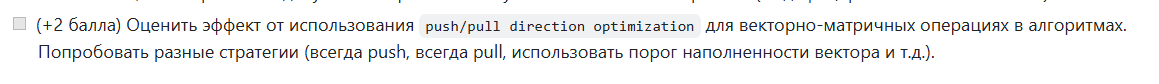

In [ ]:

def modified_Bellman_Ford(A, start_vertex, threshold=0.0):
    # Изначально устанавливаем порог в 0 (по умолчанию используется push)
    num_vertices = A.nrows
    distances = Vector(dtypes.INT64, num_vertices)
    distances[start_vertex] << 0
    temp_distances = distances.dup()

    for _ in range(num_vertices - 1):
        previous_distances = temp_distances.dup()

        # push
        if threshold == 0.0:
            temp_distances(binary.min) << temp_distances.vxm(A, semiring.min_plus)

        # pull
        elif threshold == 1.0:
            temp_distances(binary.min) << A.T.mxv(temp_distances, semiring.min_plus)

        # multi-режим
        else:
            if temp_distances.nvals / temp_distances.size > threshold:
                temp_distances(binary.min) << A.T.mxv(temp_distances, semiring.min_plus)
            else:
                temp_distances(binary.min) << temp_distances.vxm(A, semiring.min_plus)

        if temp_distances.isequal(previous_distances):
            break

    previous_distances = temp_distances.dup()
    # push
    if threshold == 0.0:
        temp_distances(binary.min) << temp_distances.vxm(A, semiring.min_plus)

    # pull
    elif threshold == 1.0:
        temp_distances(binary.min) << A.T.mxv(temp_distances, semiring.min_plus)

    # multi-режим
    else:
        if temp_distances.nvals / temp_distances.size > threshold:
            temp_distances(binary.min) << A.T.mxv(temp_distances, semiring.min_plus)
        else:
            temp_distances(binary.min) << temp_distances.vxm(A, semiring.min_plus)

    if not temp_distances.isequal(previous_distances):
        return "ВНИМАНИЕ: Обнаружен цикл отрицательного веса"

    result = Vector(dtypes.FP64, num_vertices)
    for i in range(num_vertices):
        if temp_distances[i].value is None:
            result[i] << float('inf')
        else:
            result[i] << temp_distances[i]
    return result

In [ ]:
def multi_source_Bellman_Ford(A, start_vertices, threshold=0.0):
    # Устанавливаем порог по умолчанию на 0 (по умолчанию используется push)
    num_columns = A.ncols
    num_start_vertices = len(start_vertices)
    distances_matrix = Matrix(dtypes.INT64, num_start_vertices, num_columns)
    for index, vertex in enumerate(start_vertices):
        distances_matrix[index, vertex] << 0
    temp_matrix = distances_matrix.dup()

    for _ in range(num_columns - 1):
        previous_matrix = temp_matrix.dup()
        for i in range(num_start_vertices):

            # push
            if threshold == 0.0:
                temp_matrix[i, :](binary.min) << temp_matrix[i, :].vxm(A, semiring.min_plus)

            # pull
            elif threshold == 1.0:
                temp_matrix[i, :](binary.min) << A.T.mxv(temp_matrix[i, :], semiring.min_plus)

            # multi-режим
            else:
                if temp_matrix[i, :].nvals / temp_matrix[i, :].size > threshold:
                    temp_matrix[i, :](binary.min) << A.T.mxv(temp_matrix[i, :], semiring.min_plus)
                else:
                    temp_matrix[i, :](binary.min) << temp_matrix[i, :].vxm(A, semiring.min_plus)

        if temp_matrix.isequal(previous_matrix):
            break

    previous_matrix = temp_matrix.dup()
    for i in range(num_start_vertices):

        # push
        if threshold == 0.0:
            temp_matrix[i, :](binary.min) << temp_matrix[i, :].vxm(A, semiring.min_plus)

        # pull
        elif threshold == 1.0:
            temp_matrix[i, :](binary.min) << A.T.mxv(temp_matrix[i, :], semiring.min_plus)

        # multi-режим
        else:
            if temp_matrix[i, :].nvals / temp_matrix[i, :].size > threshold:
                temp_matrix[i, :](binary.min) << A.T.mxv(temp_matrix[i, :], semiring.min_plus)
            else:
                temp_matrix[i, :](binary.min) << temp_matrix[i, :].vxm(A, semiring.min_plus)

    if not temp_matrix.isequal(previous_matrix):
        return "ВНИМАНИЕ: Обнаружен цикл отрицательного веса"

    result = Matrix(dtypes.FP64, num_start_vertices, num_columns)
    for i in range(num_start_vertices):
        for j in range(num_columns):
            if temp_matrix[i, j].value is None:
                result[i, j] << float('inf')
            else:
                result[i, j] << temp_matrix[i, j]
    return result

In [ ]:
def create_random_graph(num_vertices, density):
    adj_matrix = np.zeros((num_vertices, num_vertices))
    for i in range(num_vertices):
        for j in range(i, num_vertices):
            if np.random.rand() < density:
                adj_matrix[i, j] = 1
    np.fill_diagonal(adj_matrix, 0)
    adj_matrix += adj_matrix.T
    adj_matrix = Matrix.from_dense(adj_matrix, missing_value=0.0)
    return adj_matrix

In [ ]:
graph = create_random_graph(1000, 0.6)
for threshold in [0.0, 0.1, 0.3, 0.7, 1.0]:  # уровень порога
    print(f'Количество вершин: 1000, плотность: 0.6, количество стартовых вершин: 30, уровень threshold: {threshold}')
    print(f'nvals: {graph.nvals}, nrows: {graph.nrows}, ncols: {graph.ncols}')
    %timeit multi_source_Bellman_Ford(graph, range(0, 30), threshold)
    print()

Количество вершин: 1000, плотность: 0.6, количество стартовых вершин: 30, уровень threshold: 0.0
nvals: 598614, nrows: 1000, ncols: 1000
4.3 s ± 566 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Количество вершин: 1000, плотность: 0.6, количество стартовых вершин: 30, уровень threshold: 0.1
nvals: 598614, nrows: 1000, ncols: 1000
4.16 s ± 355 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Количество вершин: 1000, плотность: 0.6, количество стартовых вершин: 30, уровень threshold: 0.3
nvals: 598614, nrows: 1000, ncols: 1000
4.3 s ± 262 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Количество вершин: 1000, плотность: 0.6, количество стартовых вершин: 30, уровень threshold: 0.7
nvals: 598614, nrows: 1000, ncols: 1000
4.21 s ± 314 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Количество вершин: 1000, плотность: 0.6, количество стартовых вершин: 30, уровень threshold: 1.0
nvals: 598614, nrows: 1000, ncols: 1000
4.37 s ± 447 ms per loop (mean ± std. dev. of

In [ ]:
graph = create_random_graph(1000, 0.6)
for threshold in [0.0, 0.1, 0.3, 0.7, 1.0]:
    print(f'Количество вершин: 1000, плотность: 0.6, уровень threshold: {threshold}')
    print(f'nvals: {graph.nvals}, nrows: {graph.nrows}, ncols: {graph.ncols}')
    %timeit modified_Bellman_Ford(graph, np.random.randint(0, graph.nrows), threshold)
    print()

Количество вершин: 1000, плотность: 0.6, уровень threshold: 0.0
nvals: 600068, nrows: 1000, ncols: 1000
128 ms ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Количество вершин: 1000, плотность: 0.6, уровень threshold: 0.1
nvals: 600068, nrows: 1000, ncols: 1000
112 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Количество вершин: 1000, плотность: 0.6, уровень threshold: 0.3
nvals: 600068, nrows: 1000, ncols: 1000
116 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Количество вершин: 1000, плотность: 0.6, уровень threshold: 0.7
nvals: 600068, nrows: 1000, ncols: 1000
128 ms ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Количество вершин: 1000, плотность: 0.6, уровень threshold: 1.0
nvals: 600068, nrows: 1000, ncols: 1000
128 ms ± 32.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



## Мысли

- Для SSSP:

Оптимизация push/pull практически не влияет на производительность модифицированного алгоритма Беллмана-Форда.

На графе с плотностью 0.6 и 30 стартовыми вершинами время выполнения колебалось от 4.16 до 4.37 секунд при разных уровнях оптимизации.

Наилучшее время — 4.16 секунды — было получено при push/pull = 0.1, но разница с другими значениями несущественна.

- Для MSSP:

Аналогично, оптимизация push/pull не оказывает заметного влияния на производительность алгоритма.

При тех же параметрах графа время выполнения находилось в диапазоне от 112 до 128 мс, в зависимости от уровня оптимизации.

Наиболее быстрое выполнение — 112 мс при push/pull = 0.1, однако преимущество несущественно по сравнению с другими значениями.

- Изменение параметра push/pull не оказывает существенного влияния на производительность модифицированного алгоритма Беллмана-Форда как в SSSP, так и в MSSP-сценариях.